In [1]:
import pandas as pd
import numpy as np
import itertools

from scipy.stats import chi2_contingency

import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Create Sample Dataset

In [2]:
authors = ["Charles Darwin", "Rene Descartes","Thomas Hobbes", "Mary Shelley", "Mark Twain"]
initials=['CD1','CD2','CD3','RD1','RD2','RD3','TB1','TB2','TB3','MS1','MS2','MS3','MT1','MT2','MT3']

In [3]:
authorSamples = list(itertools.chain.from_iterable([[a+": "+str(i) for i in [1,2,3]] for a in authors]))

In [4]:
authorSamples

['Charles Darwin: 1',
 'Charles Darwin: 2',
 'Charles Darwin: 3',
 'Rene Descartes: 1',
 'Rene Descartes: 2',
 'Rene Descartes: 3',
 'Thomas Hobbes: 1',
 'Thomas Hobbes: 2',
 'Thomas Hobbes: 3',
 'Mary Shelley: 1',
 'Mary Shelley: 2',
 'Mary Shelley: 3',
 'Mark Twain: 1',
 'Mark Twain: 2',
 'Mark Twain: 3']

In [5]:
chars=["B", "C", "D", "F", "G", "H", "I", "L", "M", "N","P", "R", "S", "U", "W", "Y"]

In [6]:
sampleCrosstab=[[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]

In [7]:
dfTableForm = pd.DataFrame(data=np.transpose(sampleCrosstab), columns=authorSamples)

In [8]:
dfTableForm.head()

,Charles Darwin: 1,Charles Darwin: 2,Charles Darwin: 3,Rene Descartes: 1,Rene Descartes: 2,Rene Descartes: 3,Thomas Hobbes: 1,Thomas Hobbes: 2,Thomas Hobbes: 3,Mary Shelley: 1,Mary Shelley: 2,Mary Shelley: 3,Mark Twain: 1,Mark Twain: 2,Mark Twain: 3
0,34,18,32,13,8,9,15,18,19,13,17,13,16,15,19
1,37,33,43,31,28,34,20,14,18,29,34,22,18,21,17
2,44,47,36,55,34,43,28,40,41,49,43,43,56,66,70
3,27,24,12,29,24,25,18,25,26,31,29,16,13,21,12
4,19,14,21,15,17,18,19,21,19,16,14,11,27,19,28


# Calculate Chi-Squared Statistic

In [9]:
grandTotal = np.sum(sampleCrosstab)

correspondenceMatrix = np.divide(sampleCrosstab,grandTotal)

rowTotals = np.sum(correspondenceMatrix, axis=1)

columnTotals = np.sum(correspondenceMatrix, axis=0)

In [10]:
independenceModel = np.outer(rowTotals, columnTotals)

In [11]:
chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
print(chiSquaredStatistic)

448.496664221


In [12]:
# Quick check - compare to scipy Chi-Squared test
statistic, prob, dof, ex = chi2_contingency(sampleCrosstab)
print(statistic)
print(np.round(prob, decimals=2))

448.496664221
0.0


# Calculating Chi-Squared Distances

In [13]:
# pre-calculate normalised rows
norm_correspondenceMatrix = np.divide(correspondenceMatrix,rowTotals[:, None])

In [14]:
chiSquaredDistances = np.zeros((correspondenceMatrix.shape[0],correspondenceMatrix.shape[0]))

norm_columnTotals = np.sum(norm_correspondenceMatrix, axis=0)
for row in range(correspondenceMatrix.shape[0]):
    chiSquaredDistances[row]=np.sqrt(np.sum(np.square(norm_correspondenceMatrix
                                                        -norm_correspondenceMatrix[row])/columnTotals, axis=1))

In [15]:
dfchiSquaredDistances = pd.DataFrame(data=np.round(chiSquaredDistances*100).astype(int), columns=authorSamples)

In [16]:
dfchiSquaredDistances

,Charles Darwin: 1,Charles Darwin: 2,Charles Darwin: 3,Rene Descartes: 1,Rene Descartes: 2,Rene Descartes: 3,Thomas Hobbes: 1,Thomas Hobbes: 2,Thomas Hobbes: 3,Mary Shelley: 1,Mary Shelley: 2,Mary Shelley: 3,Mark Twain: 1,Mark Twain: 2,Mark Twain: 3
0,0,21,24,29,35,33,36,39,34,27,31,38,43,38,42
1,21,0,32,20,26,24,32,33,28,23,26,31,40,33,41
2,24,32,0,40,34,35,37,39,35,37,29,37,46,48,47
3,29,20,40,0,22,21,29,33,30,15,29,32,32,26,35
4,35,26,34,22,0,16,23,28,26,24,24,30,37,38,41
5,33,24,35,21,16,0,26,27,24,19,22,31,42,41,43
6,36,32,37,29,23,26,0,25,24,26,33,34,35,37,36
7,39,33,39,33,28,27,25,0,8,29,26,35,39,41,37
8,34,28,35,30,26,24,24,8,0,26,23,33,40,41,39
9,27,23,37,15,24,19,26,29,26,0,23,27,35,29,36


# Calculating Row Scores

In [17]:
standardizedResiduals = np.divide((correspondenceMatrix-independenceModel),np.sqrt(independenceModel))

In [18]:
u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

In [19]:
deltaR = np.diag(np.divide(1.0,np.sqrt(rowTotals)))

In [20]:
rowScores=np.dot(np.dot(deltaR,u),np.diag(s))

In [49]:
dfFirstTwoComponents = pd.DataFrame(data=[l[0:2] for l in rowScores], columns=['X', 'Y'], index=initials)

In [50]:
dfFirstTwoComponents

,X,Y
CD1,-0.070977,0.200620
CD2,-0.062109,0.094512
CD3,-0.148509,0.158889
RD1,0.030697,0.019028
RD2,-0.069552,-0.068382
RD3,-0.115119,-0.063805
TB1,-0.006890,-0.103594
TB2,-0.053382,-0.170423
TB3,-0.083822,-0.121758
MS1,-0.016408,0.001383


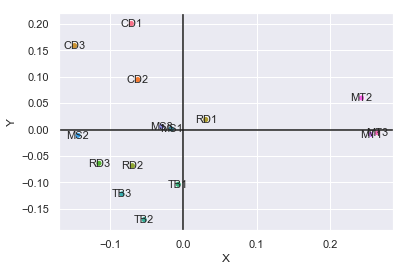

In [61]:
ax = sns.scatterplot(data=dfFirstTwoComponents,x='X', y='Y', hue=initials)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.get_legend().set_visible(False)

for label in initials:
    plt.annotate(label, 
                 (dfFirstTwoComponents.loc[label,:]['X'],
                  dfFirstTwoComponents.loc[label,:]['Y']),
                 horizontalalignment='center', verticalalignment='center',size=11)